<a href="https://colab.research.google.com/github/Prakhosha/Regressions_method_comparison/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Cerdas STI Tugas 1 Regresi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ls

 II4035-regresi-test.csv        Sistem_Cerdas.ipynb
 II4035-regresi-train.csv      'Sistem Cerdas STI.ipynb'
 II4035-regression-demo.ipynb


##SKlearn

### Polynomial Regression

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
train_file = "II4035-regresi-train.csv"
test_file = "II4035-regresi-test.csv"

training=np.genfromtxt(train_file,delimiter=',',skip_header=1)
test    =np.genfromtxt(test_file,delimiter=',',skip_header=1)

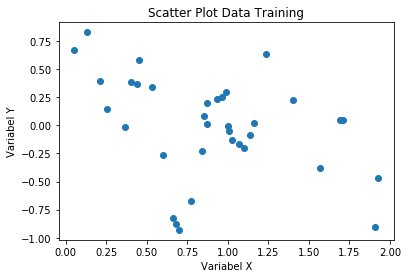

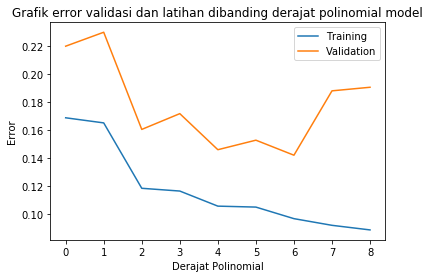

In [ ]:
x_Train = training[:,1].reshape(-1,1)
y_Train = training[:,2].reshape(-1,1)
x_test = test[:,1].reshape(-1,1)
order3 = np.argsort(x_Train, axis=0)
x_Train = np.array(x_Train)[order3].reshape(-1,1)
y_Train = np.array(y_Train)[order3].reshape(-1,1)


x_train, x_val, y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.3, random_state=10)

plt.figure(1)
plt.plot(x_train,y_train, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Training')
plt.savefig('Data_Training_Poly.png')

order1 = np.argsort(x_train, axis=0)
order2 = np.argsort(x_val, axis=0)
x_train = np.array(x_train)[order1].reshape(-1,1)
x_val = np.array(x_val)[order2].reshape(-1,1)
y_train = np.array(y_train)[order1].reshape(-1,1)
y_val = np.array(y_val)[order2].reshape(-1,1)

model_poly = []
y_pred_list = []
error_list = []
error_val_list = []

for i in range(1,10):

  model = LinearRegression().fit(PolynomialFeatures(degree = i ).fit_transform(x_train), y_train)
  y_pred = model.predict(PolynomialFeatures(degree = i ).fit_transform(x_train))
  y_pred_val = model.predict(PolynomialFeatures(degree = i ).fit_transform(x_val))

  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  model_poly.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

plt.figure(2)
plt.plot(error_list, label='Training')
plt.plot(error_val_list, label='Validation')
plt.legend()
plt.xlabel('Derajat Polinomial')
plt.ylabel('Error')
plt.title('Grafik error validasi dan latihan dibanding derajat polinomial model')
plt.savefig('Validasi_Poly.png')

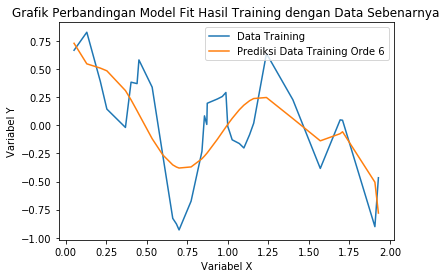

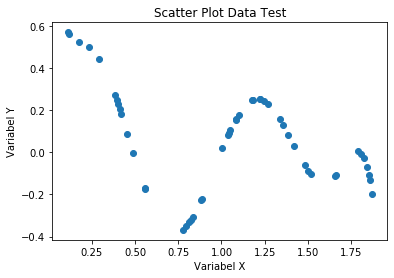

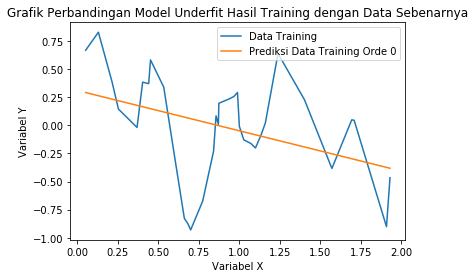

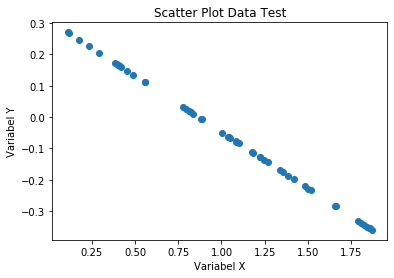

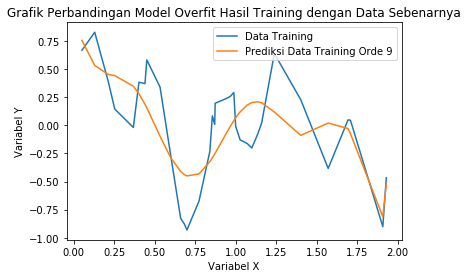

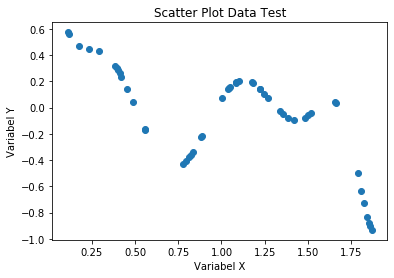

In [ ]:
plt.figure(2)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[6], label='Prediksi Data Training Orde 6')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Fit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Fit_Poly.png')

y_pred_test = model_poly[6].predict(PolynomialFeatures(degree = 7 ).fit_transform(x_test))
plt.figure(3)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Fit_Poly.png')

dat = {'X' : x_test[:,0], 'Y Prediksi' : y_pred_test[:,0]}
pd.DataFrame(dat).to_csv('Test_Polinomial.csv')

plt.figure(4)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[0], label='Prediksi Data Training Orde 0')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Underfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Underfit_Poly.png')

y_pred_test = model_poly[0].predict(PolynomialFeatures(degree = 1 ).fit_transform(x_test))
plt.figure(5)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Underfit_Poly.png')

plt.figure(6)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[8], label='Prediksi Data Training Orde 9')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Overfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Overfit_Poly.png')

y_pred_test = model_poly[8].predict(PolynomialFeatures(degree = 9 ).fit_transform(x_test))
plt.figure(7)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Overfit_Poly.png')

### SVM

In [ ]:
from sklearn.svm import SVR
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
train_file = "II4035-regresi-train.csv"
test_file = "II4035-regresi-test.csv"

In [ ]:
training = np.genfromtxt(train_file, delimiter=',', skip_header=1)
test = np.genfromtxt(test_file, delimiter=',', skip_header=1)

In [ ]:
x_Train = training[:,1].reshape(-1,1)
y_Train = training[:,2].reshape(-1,1)
x_test = test[:,1].reshape(-1,1)

order3 = np.argsort(x_Train, axis=0)
x_Train = np.array(x_Train)[order3].reshape(-1,1)
y_Train = np.array(y_Train)[order3].reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

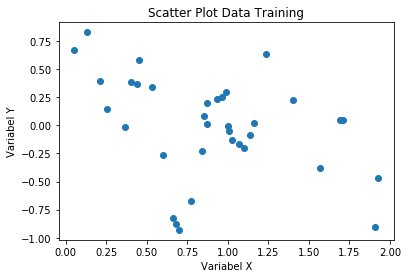

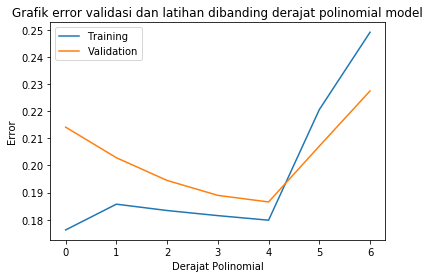

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.3, random_state=10)

plt.figure(1)
plt.plot(x_train,y_train, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Training')
plt.savefig('Data_Training_SVM.png')

order1 = np.argsort(x_train, axis=0)
order2 = np.argsort(x_val, axis=0)
x_train = np.array(x_train)[order1].reshape(-1,1)
x_val = np.array(x_val)[order2].reshape(-1,1)
y_train = np.array(y_train)[order1].reshape(-1,1)
y_val = np.array(y_val)[order2].reshape(-1,1)

model_svr = []
y_pred_list = []
error_list = []
error_val_list = []

for i in range(1,8):

  model = SVR(kernel='poly', degree = i).fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  model_svr.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

plt.figure(2)
plt.plot(error_list, label='Training')
plt.plot(error_val_list, label='Validation')
plt.legend()
plt.xlabel('Derajat Polinomial')
plt.ylabel('Error')
plt.title('Grafik error validasi dan latihan dibanding derajat polinomial model')
plt.savefig('Validasi_SVM.png')

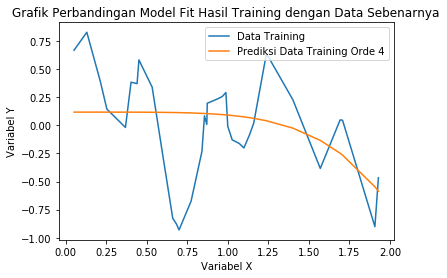

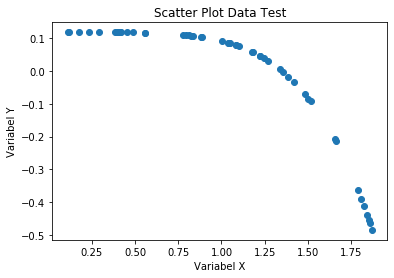

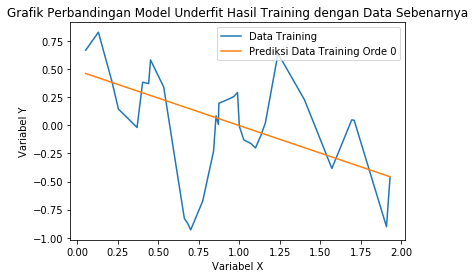

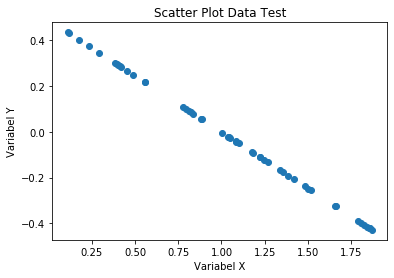

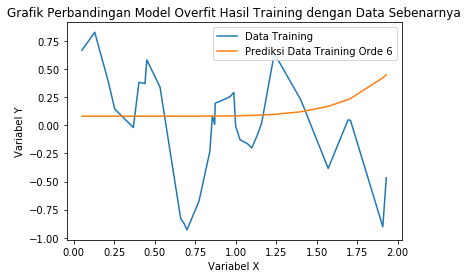

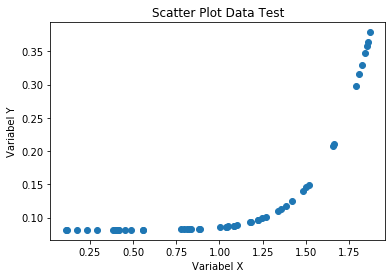

In [ ]:
plt.figure(2)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[4], label='Prediksi Data Training Orde 4')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Fit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Fit_SVM.png')

y_pred_test = model_svr[4].predict(x_test)
plt.figure(3)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Fit_SVM.png')

dat = {'X' : x_test[:,0], 'Y Prediksi' : y_pred_test[:,]}
pd.DataFrame(dat).to_csv('Test_SVM.csv')

plt.figure(4)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[0], label='Prediksi Data Training Orde 0')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Underfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Underit_SVM.png')

y_pred_test = model_svr[0].predict(x_test)
plt.figure(5)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Underfit_SVM.png')

plt.figure(6)
plt.plot(x_train, y_train, label='Data Training')
plt.plot(x_train, y_pred_list[6], label='Prediksi Data Training Orde 6')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Overfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Overfit_SVM.png')

y_pred_test = model_svr[6].predict(x_test)
plt.figure(7)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Overfit_SVM.png')

### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [ ]:
train_file = "II4035-regresi-train.csv"
test_file = "II4035-regresi-test.csv"

In [ ]:
training = np.genfromtxt(train_file, delimiter=',', skip_header=1)
test = np.genfromtxt(test_file, delimiter=',', skip_header=1)

In [ ]:
x_Train = training[:,1].reshape(-1,1)
y_Train = training[:,2].reshape(-1,1)
x_test = test[:,1].reshape(-1,1)
order3 = np.argsort(x_Train, axis=0)
x_Train = np.array(x_Train)[order3].reshape(-1,1)
y_Train = np.array(y_Train)[order3].reshape(-1,1)

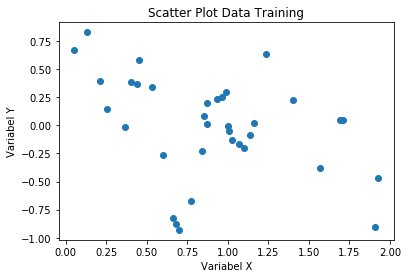

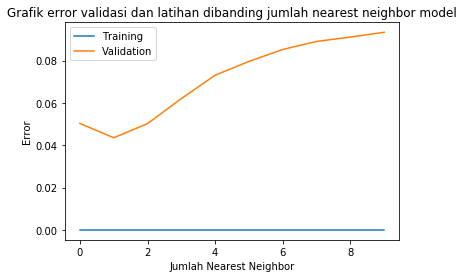

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.3, random_state=10)

plt.figure(1)
plt.plot(x_train,y_train, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Training')
plt.savefig('Data_Training_KNN.png')

order1 = np.argsort(x_train, axis=0)
order2 = np.argsort(x_val, axis=0)
x_train = np.array(x_train)[order1].reshape(-1,1)
x_val = np.array(x_val)[order2].reshape(-1,1)
y_train = np.array(y_train)[order1].reshape(-1,1)
y_val = np.array(y_val)[order2].reshape(-1,1)

model_kn = []
y_pred_list = []
error_list = []
error_val_list = []

for i in range(1,11):

  model = KNeighborsRegressor(n_neighbors= i , weights='distance', algorithm='auto').fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  model_kn.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

plt.figure(2)
plt.plot(error_list, label='Training')
plt.plot(error_val_list, label='Validation')
plt.legend()
plt.xlabel('Jumlah Nearest Neighbor')
plt.ylabel('Error')
plt.title('Grafik error validasi dan latihan dibanding jumlah nearest neighbor model')
plt.savefig('Validasi_KNN.png')

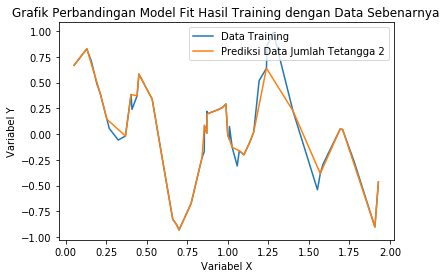

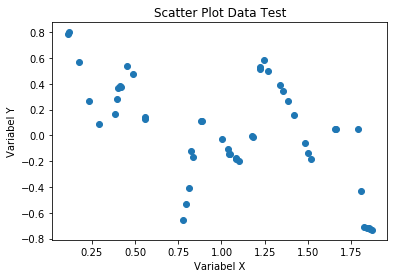

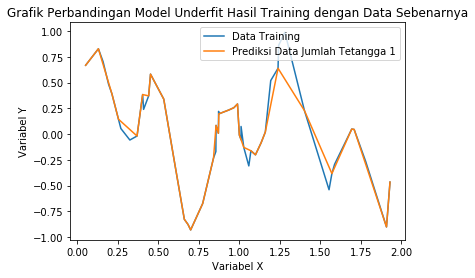

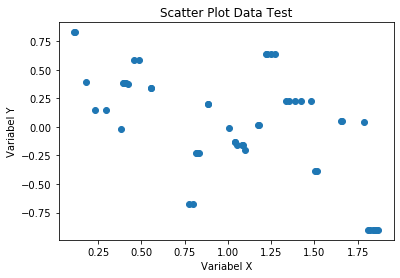

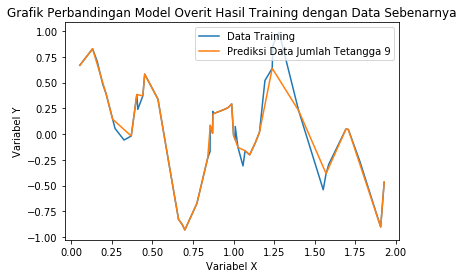

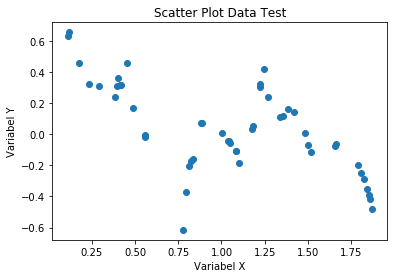

In [ ]:
plt.figure(2)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[1], label='Prediksi Data Jumlah Tetangga 2')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Fit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Fit_KNN.png')

y_pred_test = model_kn[1].predict(x_test)
plt.figure(3)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Fit_KNN.png')

dat = {'X' : x_test[:,0], 'Y Prediksi' : y_pred_test[:,0]}
pd.DataFrame(dat).to_csv('Test_KNN.csv')

plt.figure(4)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[0], label='Prediksi Data Jumlah Tetangga 1')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Underfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Underfit_KNN.png')

y_pred_test = model_kn[0].predict(x_test)
plt.figure(5)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Underfit_KNN.png')

plt.figure(6)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[8], label='Prediksi Data Jumlah Tetangga 9')
plt.legend()
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Overit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Overfit_KNN.png')

y_pred_test = model_kn[8].predict(x_test)
plt.figure(7)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Overfit_KNN.png')

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

In [ ]:
train_file = "II4035-regresi-train.csv"
test_file = "II4035-regresi-test.csv"

In [ ]:
training = np.genfromtxt(train_file, delimiter=',', skip_header=1)
test = np.genfromtxt(test_file, delimiter=',', skip_header=1)

In [ ]:
x_Train = training[:,1].reshape(-1,1)
y_Train = training[:,2].reshape(-1,1)
x_test = test[:,1].reshape(-1,1)

order3 = np.argsort(x_Train, axis=0)
x_Train = np.array(x_Train)[order3].reshape(-1,1)
y_Train = np.array(y_Train)[order3].reshape(-1,1) 

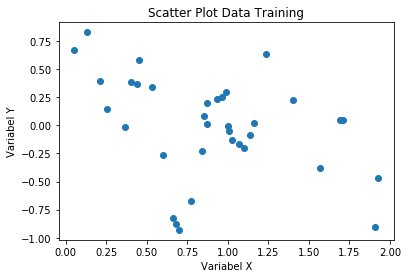

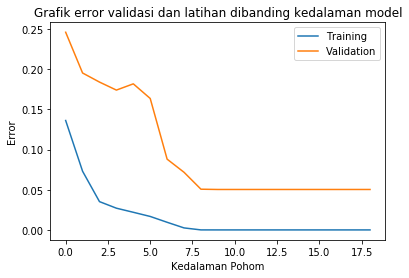

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_Train, y_Train, test_size=0.3, random_state=10)

plt.figure(1)
plt.plot(x_train,y_train, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Training')
plt.savefig('Data_Training_DT.png')

order1 = np.argsort(x_train, axis=0)
order2 = np.argsort(x_val, axis=0)
x_train = np.array(x_train)[order1].reshape(-1,1)
x_val = np.array(x_val)[order2].reshape(-1,1)
y_train = np.array(y_train)[order1].reshape(-1,1)
y_val = np.array(y_val)[order2].reshape(-1,1)

model_dt = []
y_pred_list = []
error_list = []
error_val_list = []

for i in range(1,20):

  model = DecisionTreeRegressor(max_depth=i).fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  model_dt.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

plt.figure(2)
plt.plot(error_list, label='Training')
plt.plot(error_val_list, label='Validation')
plt.legend()
plt.xlabel('Kedalaman Pohom')
plt.ylabel('Error')
plt.title('Grafik error validasi dan latihan dibanding kedalaman model')
plt.savefig('Validasi_DT.png')

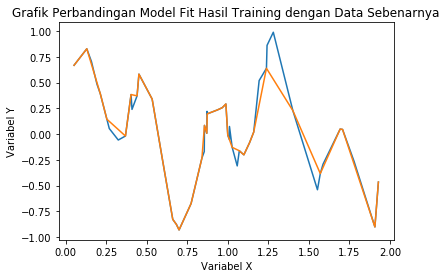

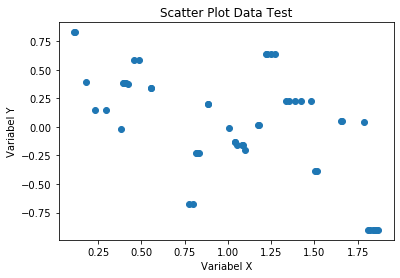

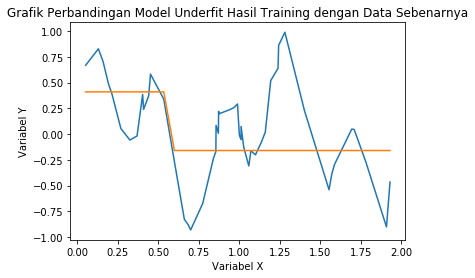

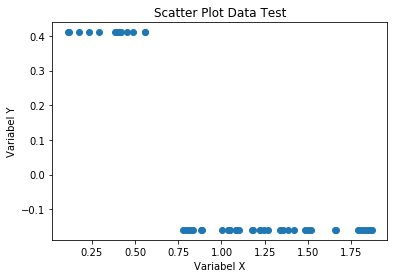

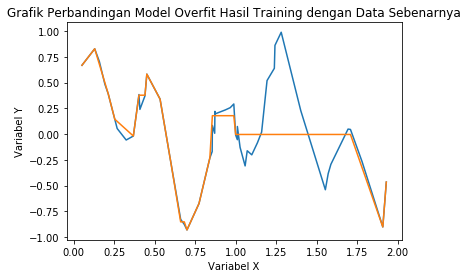

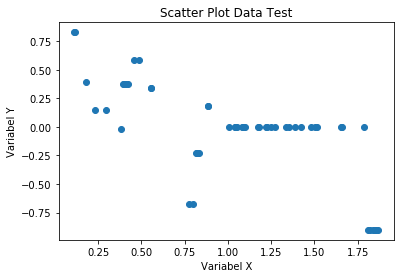

In [ ]:
plt.figure(2)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[10], label='Prediksi Data Training Kedalaman 10')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Fit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Fit_DT.png')

y_pred_test = model_dt[10].predict(x_test)
plt.figure(3)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Fit_DT.png')

dat = {'X' : x_test[:,0], 'Y Prediksi' : y_pred_test[:,]}
pd.DataFrame(dat).to_csv('Test_DT.csv')

plt.figure(4)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[0], label='Prediksi Data Training Kedalaman 1')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Underfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Fit_Underfit.png')

y_pred_test = model_dt[0].predict(x_test)
plt.figure(5)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Underfit_DT.png')

plt.figure(6)
plt.plot(x_Train, y_Train, label='Data Training')
plt.plot(x_train, y_pred_list[4], label='Prediksi Data Training Kedalaman 5')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Grafik Perbandingan Model Overfit Hasil Training dengan Data Sebenarnya')
plt.savefig('Data_Training_Overfit_DT.png')

y_pred_test = model_dt[4].predict(x_test)
plt.figure(7)
plt.plot(x_test, y_pred_test, 'o')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Data Test')
plt.savefig('Data_Test_Overfit_DT.png')